In [1]:
import pandas as pd
import numpy as np
import polars as pl


In [1]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017")
# myclient = pymongo.MongoClient('localhost',27017)
print(myclient.list_database_names())

['admin', 'config', 'local', 'test']


In [9]:
rets = myclient.test.col.find()
for ret in rets:
    print(ret)

{'_id': ObjectId('64f59f513ff67910f6bee318'), 'title': 'PHP 教程', 'description': 'PHP 是一种创建动态交互性站点的强有力的服务器端脚本语言。', 'by': '菜鸟教程', 'url': 'http://www.runoob.com', 'tags': ['php'], 'likes': 200}
{'_id': ObjectId('64f59f5c3ff67910f6bee319'), 'title': 'Java 教程', 'description': 'Java 是由Sun Microsystems公司于1995年5月推出的高级程序设计语言。', 'by': '菜鸟教程', 'url': 'http://www.runoob.com', 'tags': ['java'], 'likes': 150}
{'_id': ObjectId('64f59f613ff67910f6bee31a'), 'title': 'MongoDB 教程', 'description': 'MongoDB 是一个 Nosql 数据库', 'by': '菜鸟教程', 'url': 'http://www.runoob.com', 'tags': ['mongodb'], 'likes': 100}
{'_id': 'Alkaid', 'sex': 'male', 'like': 'comp', 'career': 'student'}


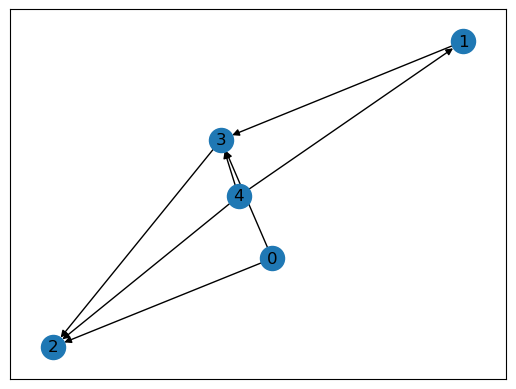

In [23]:
from random import randint, shuffle, random
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
node_num = 5
edge_num = randint(1, min(node_num**2, 20))
nodes = list(range(node_num))
shuffle(nodes)
for i in range(edge_num):
    p1 = randint(0, node_num - 2)
    p2 = randint(p1 + 1, node_num - 1)
    x = nodes[p1]
    y = nodes[p2]
    weight = random()
    G.add_edge(x, y, weight=weight)
nx.draw_networkx(G)
plt.show()

In [15]:
results = myclient.test.col.find().sort('likes', pymongo.ASCENDING)
# print([result['likes'] for result in results])

{'_id': 'Alkaid', 'sex': 'male', 'like': 'comp', 'career': 'student'}

In [7]:
df = pl.DataFrame(
    {
        "nrs": [1, 2, 3, None, 5],
        "names": ["foo", "ham", "spam", "egg", None],
        "random": np.random.rand(5),
        "groups": ["A", "A", "B", "C", "B"],
    }
)
print(df)

shape: (5, 4)
┌──────┬───────┬──────────┬────────┐
│ nrs  ┆ names ┆ random   ┆ groups │
│ ---  ┆ ---   ┆ ---      ┆ ---    │
│ i64  ┆ str   ┆ f64      ┆ str    │
╞══════╪═══════╪══════════╪════════╡
│ 1    ┆ foo   ┆ 0.73417  ┆ A      │
│ 2    ┆ ham   ┆ 0.977072 ┆ A      │
│ 3    ┆ spam  ┆ 0.989073 ┆ B      │
│ null ┆ egg   ┆ 0.211578 ┆ C      │
│ 5    ┆ null  ┆ 0.613844 ┆ B      │
└──────┴───────┴──────────┴────────┘


In [25]:
df.write_csv("test.csv")

In [14]:
df.filter(df['random'] > 0.5)

nrs,names,random,groups,nrs_sum,count
i64,str,f64,str,i64,u32
1,"""foo""",0.73417,"""A""",11,5
2,"""ham""",0.977072,"""A""",11,5
3,"""spam""",0.989073,"""B""",11,5
5,null,0.613844,"""B""",11,5


In [8]:
out = df.select(
    pl.sum("nrs"),
    pl.col("names").sort(),
    pl.col("names").first().alias("first name"),
    (pl.mean("nrs") * 10).alias("10xnrs"),
)
print(out)

shape: (5, 4)
┌─────┬───────┬────────────┬────────┐
│ nrs ┆ names ┆ first name ┆ 10xnrs │
│ --- ┆ ---   ┆ ---        ┆ ---    │
│ i64 ┆ str   ┆ str        ┆ f64    │
╞═════╪═══════╪════════════╪════════╡
│ 11  ┆ null  ┆ foo        ┆ 27.5   │
│ 11  ┆ egg   ┆ foo        ┆ 27.5   │
│ 11  ┆ foo   ┆ foo        ┆ 27.5   │
│ 11  ┆ ham   ┆ foo        ┆ 27.5   │
│ 11  ┆ spam  ┆ foo        ┆ 27.5   │
└─────┴───────┴────────────┴────────┘


In [9]:
df = df.with_columns(
    pl.sum("nrs").alias("nrs_sum"),
    pl.col("random").count().alias("count"),
)
print(df)

shape: (5, 6)
┌──────┬───────┬──────────┬────────┬─────────┬───────┐
│ nrs  ┆ names ┆ random   ┆ groups ┆ nrs_sum ┆ count │
│ ---  ┆ ---   ┆ ---      ┆ ---    ┆ ---     ┆ ---   │
│ i64  ┆ str   ┆ f64      ┆ str    ┆ i64     ┆ u32   │
╞══════╪═══════╪══════════╪════════╪═════════╪═══════╡
│ 1    ┆ foo   ┆ 0.73417  ┆ A      ┆ 11      ┆ 5     │
│ 2    ┆ ham   ┆ 0.977072 ┆ A      ┆ 11      ┆ 5     │
│ 3    ┆ spam  ┆ 0.989073 ┆ B      ┆ 11      ┆ 5     │
│ null ┆ egg   ┆ 0.211578 ┆ C      ┆ 11      ┆ 5     │
│ 5    ┆ null  ┆ 0.613844 ┆ B      ┆ 11      ┆ 5     │
└──────┴───────┴──────────┴────────┴─────────┴───────┘


In [6]:
print(df.sample(2))

shape: (2, 3)
┌─────────┬─────────────────────┬───────┐
│ integer ┆ date                ┆ float │
│ ---     ┆ ---                 ┆ ---   │
│ i64     ┆ datetime[μs]        ┆ f64   │
╞═════════╪═════════════════════╪═══════╡
│ 3       ┆ 2022-01-03 00:00:00 ┆ 6.0   │
│ 4       ┆ 2022-01-04 00:00:00 ┆ 7.0   │
└─────────┴─────────────────────┴───────┘
